# STEAMSPY - EDA

#### In the first chapter we have pulled our data by calling API request, which was followed by cleaning our data. 
#### After we have completed data processing, we can start exploratory data analysis.

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
import sys
print(sys.version)

3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [3]:
# Reading csv file into a DataFrame
df_steamspy = pd.read_csv(
    r"..\SteamSpy\steam_spy_apps_cleaned.csv",
    keep_default_na=False,
)
df_steamspy.head()

,appid,name,developer,publisher,rating,positive,negative,avg_owners,average_forever,median_forever,price_USD,initialprice_USD,discount_pct,english,languages,genre,tags
0,570,Dota 2,Valve,Valve,82.3,1675039,360483,350000000,37327,902,0.00,0.00,0.0,Yes,"English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Free to Play, Strategy","Free to Play, MOBA, Multiplayer, Strategy, e-s..."
1,1063730,New World,Amazon Games,Amazon Games,70.2,182077,77125,75000000,4641,1946,39.99,39.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Massively Multiplayer, RPG","Massively Multiplayer, Open World, MMORPG, RPG..."
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",57.4,1269439,943280,75000000,24540,8582,0.00,0.00,0.0,Yes,"English, Korean, Simplified Chinese, French, G...","Action, Adventure, Free to Play, Massively Mul...","Survival, Shooter, Battle Royale, Multiplayer,..."
3,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,80.5,568429,137990,75000000,8255,1279,0.00,0.00,0.0,Yes,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play","Free to Play, Multiplayer, Battle Royale, Shoo..."
4,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,88.8,6612258,833900,75000000,29864,6805,0.00,0.00,0.0,Yes,"English, Czech, Danish, Dutch, Finnish, French...","Action, Free to Play","FPS, Shooter, Multiplayer, Competitive, Action..."


#### A general exploration of the data structure
Let's create a type column for free and paid apps, and then select avg_owners, rating, average and median playtime and price_USD columns for general exploration.
Also, apply a log transformation to the avg_owners column for reasonable comparison.

In [4]:
df_steamspy_exp = df_steamspy.copy()
df_steamspy_exp["type"] = "Free"
df_steamspy_exp.loc[df_steamspy_exp["price_USD"] > 0, "type"] = "Paid"
df_steamspy_exp.head()

,appid,name,developer,publisher,rating,positive,negative,avg_owners,average_forever,median_forever,price_USD,initialprice_USD,discount_pct,english,languages,genre,tags,type
0,570,Dota 2,Valve,Valve,82.3,1675039,360483,350000000,37327,902,0.00,0.00,0.0,Yes,"English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Free to Play, Strategy","Free to Play, MOBA, Multiplayer, Strategy, e-s...",Free
1,1063730,New World,Amazon Games,Amazon Games,70.2,182077,77125,75000000,4641,1946,39.99,39.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Massively Multiplayer, RPG","Massively Multiplayer, Open World, MMORPG, RPG...",Paid
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",57.4,1269439,943280,75000000,24540,8582,0.00,0.00,0.0,Yes,"English, Korean, Simplified Chinese, French, G...","Action, Adventure, Free to Play, Massively Mul...","Survival, Shooter, Battle Royale, Multiplayer,...",Free
3,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,80.5,568429,137990,75000000,8255,1279,0.00,0.00,0.0,Yes,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play","Free to Play, Multiplayer, Battle Royale, Shoo...",Free
4,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,88.8,6612258,833900,75000000,29864,6805,0.00,0.00,0.0,Yes,"English, Czech, Danish, Dutch, Finnish, French...","Action, Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",Free


In [6]:
df_type = pd.DataFrame(
    zip(
        df_steamspy_exp["type"],
        np.log10(df_steamspy_exp["avg_owners"]),
        df_steamspy_exp["rating"],
        df_steamspy_exp["average_forever"],
        df_steamspy_exp["median_forever"],
        df_steamspy_exp["price_USD"],
    ),
    columns=[
        "payment_type",
        "average_owners",
        "rating",
        "average_playtime",
        "median_playtime",
        "price",
    ],
)
df_type.head()

,payment_type,average_owners,rating,average_playtime,median_playtime,price
0,Free,8.544068,82.3,37327,902,0.00
1,Paid,7.875061,70.2,4641,1946,39.99
2,Free,7.875061,57.4,24540,8582,0.00
3,Free,7.875061,80.5,8255,1279,0.00
4,Free,7.875061,88.8,29864,6805,0.00


#### We can use seaborns pairplot, where we can observe KDE (kernel density estimation) and scatter plots describing the data, by looking at any patterns and potential relationships.

In [11]:
import warnings
warnings.filterwarnings('ignore')

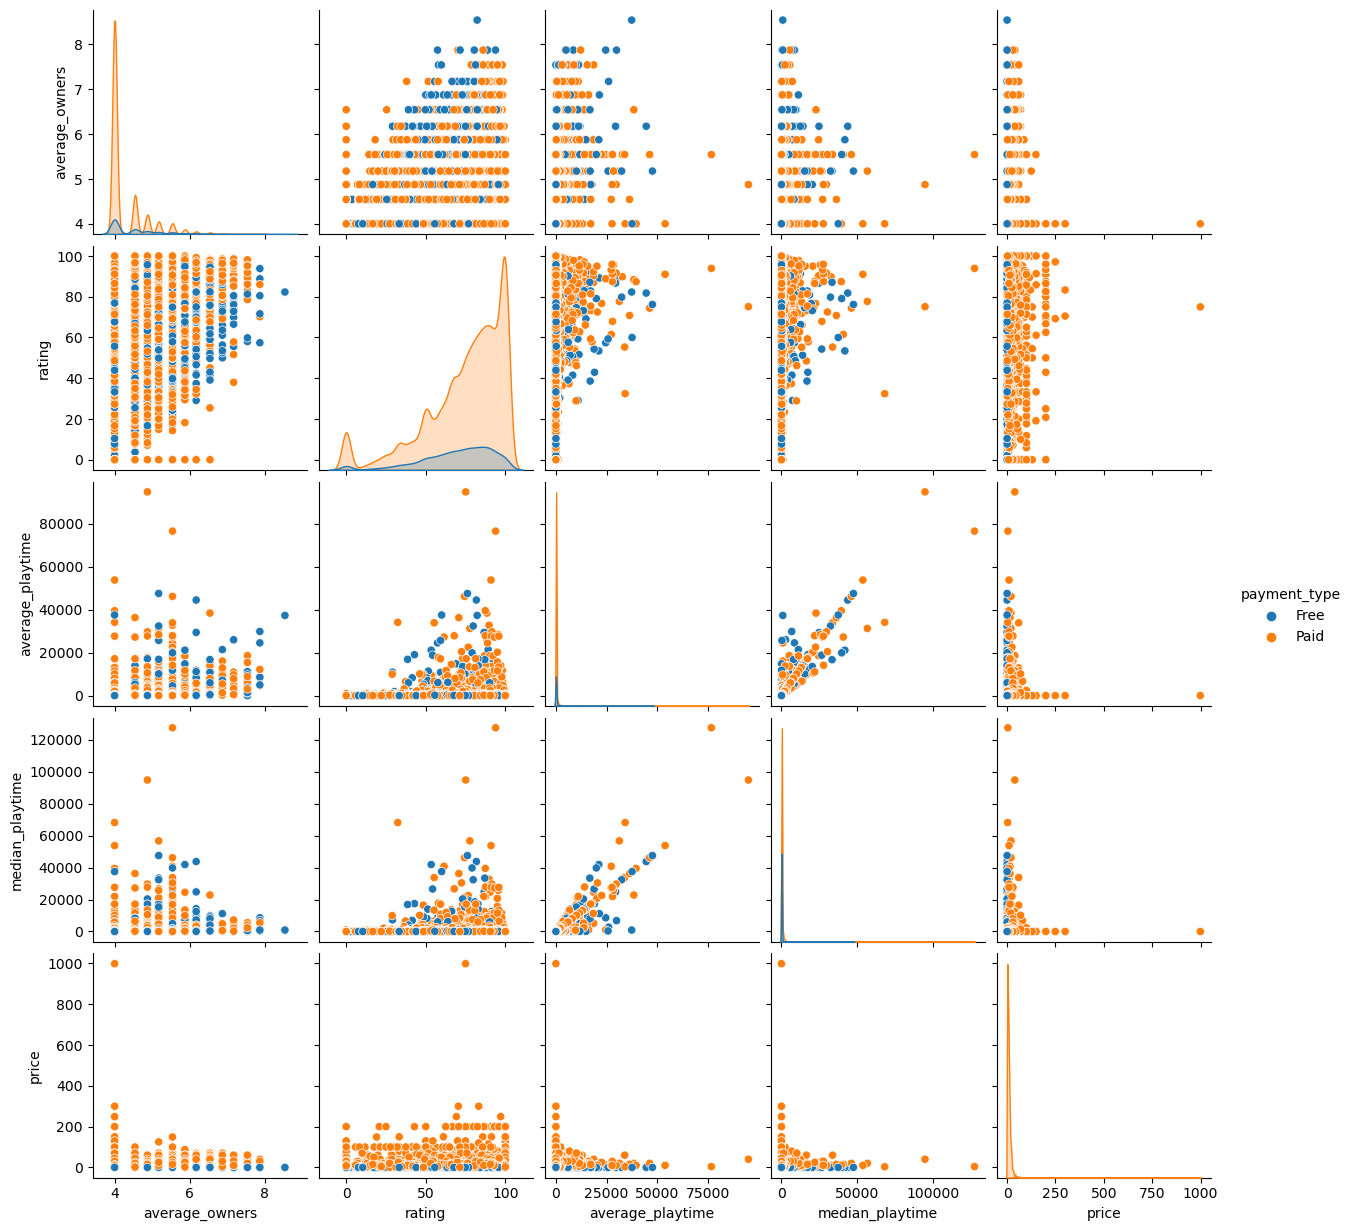

In [12]:
sns.pairplot(df_type, hue="payment_type")
plt.show()

#### Looking at the pairplot we can make some preliminary assumptions
    - There are much more paid apps than free apps in our data
    - There are outliers within paid apps to consider
    - Majority of paid apps are less than 100 USD
    - The most owned app in data is a free game, while the most expensive app is one of the least owned
    - Cheaper apps have more owners
    - Apps with higher rating have more playtime

#### A few notes to consider before moving on: 
 - App ratings and number of owners are biased in the dataset, since a app with 9 positive ratings out of 10 will have the same rating as the app with 900 positive rates out of 1000.
 - Average owners of the apps are average of the two number as it was in raw data, where values indicated as 0..20.000 might have 100% rating with total owners of 10.
 - We can exclude all apps which have 10.000 average owners or we can exclude apps where the total of positive and negative ratings are below a certain threshold. We will proceed with later, because; first of all apps with owners between 0..20.000 do not necessarily tell us anything of the app's quality and also most of the data is within 10.000 (0..20.000) owners as displayed below.

In [17]:
df_steamspy_exp.groupby('avg_owners')['appid'].count()

avg_owners
10000        42669
35000         8448
75000         4353
150000        2842
350000        2440
750000        1036
1500000        617
3500000        373
7500000        114
15000000        39
35000000        24
75000000         7
350000000        1
Name: appid, dtype: int64

Let's add a new column "total_ratings" to the dataframe and compare ratings of all data to over 100 total rating data.

In [5]:
df_steamspy_exp["total_ratings"] = df_steamspy_exp["positive"] + df_steamspy_exp["negative"]

In [19]:
over_100 = df_steamspy_exp.drop(df_steamspy_exp[df_steamspy_exp["total_ratings"] < 100].index)

In [20]:
df_a = df_steamspy_exp.copy()
df_b = over_100.copy()

In [21]:
df_a["subset"] = "All Ratings"
df_b["subset"] = "Total Ratings Over 100"

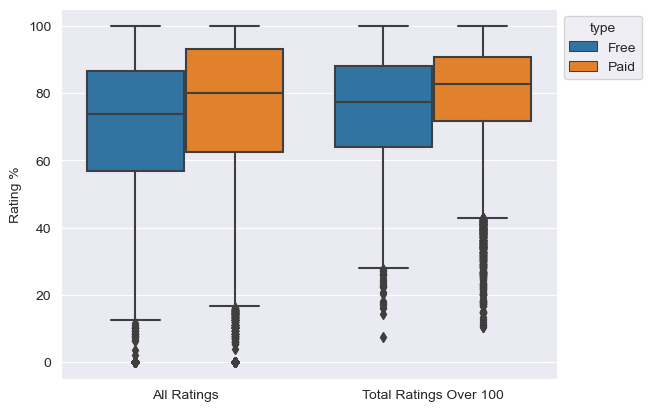

In [22]:
sns.set_style("darkgrid")
plot = sns.boxplot(
    data=pd.concat([df_a, df_b]), x="subset", y="rating", hue="type"
)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set(xlabel="", ylabel="Rating %")
plt.show()

#### From the boxplot above we can assume the following:
 - At first glance, both cases have similar shape
 - The median rating for paid apps is higher than free apps in both datas
 - 75th percentile for free apps is very similar in both cases, where as 25th percentile is noticably higher in the subset data
 - Interquartile range in "All Ratings" is spread further for both free and paid games compared to the subset data
#### However, before coming to any conclusion about the app ratings we have to do further exploration.

#### Looking at ratings of paid and free apps for average owners of 10000 and above

In [23]:
own_over_10000 = df_steamspy_exp[df_steamspy_exp["avg_owners"] > 10000]
avg_own_10000 = df_steamspy_exp[df_steamspy_exp["avg_owners"] <= 10000]

In [24]:
own_over_10000 = own_over_10000.sort_values("type")
avg_own_10000 = avg_own_10000.sort_values("type")

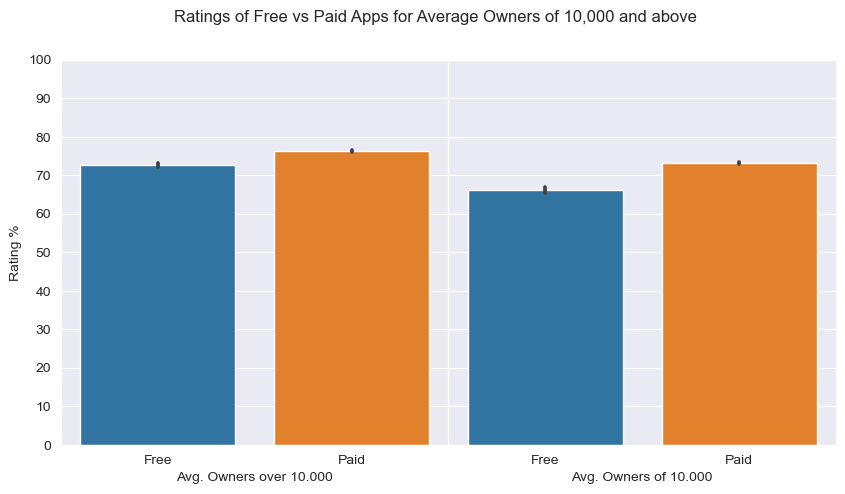

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

sns.barplot(x="type", y="rating", data=own_over_10000, ax=axes[0])
axes[0].set_xlabel(xlabel="Avg. Owners over 10.000")
axes[0].set_ylabel(ylabel="Rating %")
axes[0].set_ylim([0, 100])

sns.barplot(x="type", y="rating", data=avg_own_10000, ax=axes[1])
axes[1].set_xlabel(xlabel="Avg. Owners of 10.000")
axes[1].set_ylim([0, 100])
axes[1].set_ylabel(ylabel="")

plt.yticks(np.arange(0, 101, 10))
plt.subplots_adjust(wspace=0)

fig.suptitle("Ratings of Free vs Paid Apps for Average Owners of 10,000 and above")

plt.show()

From this bar plot we can see that in both cases, the paid apps have slightly higher rating than free apps.
Also, the apps with over 10.000 average owners have higher ratings for both paid and free apps.

### Statistical tests
In order to test whether the difference in average rating between free games and paid games is statistically significant, we can use a two-sample t-test. This type of t-test is used to compare the means of two independent groups to determine if they are different from each other. In our case, the two groups (free games and paid games) are independent because a game cannot be both free and paid at the same time.

1. Stating hypotheses:
    - Null Hypothesis (H_null): The means of the two groups are equal. Meaning that there is no difference in average rating between free and paid games
    - Alternative Hypothesis (H_alt): The means of the two groups are not equal. Meaning that there is a difference in average rating between free and paid games

2. Choosing significance level:
    - Usually, a significance level (denoted as alpha) of 0.05 is used
    - This means that we are willing to accept a 5% chance of rejecting the null hypothesis when it is true

3. Performing the t-test:
    - We can use the 'scipy.stats.ttest_ind' function from the SciPy library to perform the two-sample t-test
    - We need to pass the ratings of the free games and the ratings of the paid games as the two samples

4. Interpreting the results: 
    - If the p-value is less than our chosen significance level (e.g., 0.05), then we can reject the H_null and conclude that there is a statistically significant difference in average rating between free and paid games
    - If the p-value is greater than our chosen significance level, then we fail reject the H_null

#### Note:
However, notice that t-test makes several assumptions, including that the data is normally distributed and that the two groups have the same variance. We should check these assumptions before performing the t-test. First let's try and use a Shapiro-Wilk test to check for normality and Levene's test to check for equal variances.

### Step - 1
We will subset our population data to total ratings over 0 to be sure that the apps at least had been given a vote. And then get the mean of ratings by type and set a significance level for interpretation.

In [6]:
df_stat = df_steamspy_exp[df_steamspy_exp["total_ratings"] > 0]
df_stat.groupby("type")["rating"].mean()

alpha = 0.05 # significance level

free_games = df_stat[df_stat["type"] == "Free"]["rating"]
paid_games = df_stat[df_stat["type"] == "Paid"]["rating"]

### Step - 2
Levene's Test:

In [28]:
W_lev, p_value_lev = stats.levene(free_games, paid_games)
print(W_lev)
print(p_value_lev)
if p_value_lev < 0.05:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

61.02046455995285
5.735725684431363e-15
The null hypothesis can be rejected


Shapiro-Wilk Test:

In [29]:
W_shap, p_value_sw = stats.shapiro(free_games)
print(W_shap)
print(p_value_sw)
if p_value_sw < 0.05:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

0.9392715692520142
0.0
The null hypothesis can be rejected


### Interpreting results:
 - Shapiro-Wilk test: 
    - W value of 0.939 suggests a moderate departure from normality.
    - H_null: data is normally distributed
    - (p_value = 0) p < alpha, reject the null hypothesis. Data is not normally distributed.
 - Levene's Test:
    - H_null: all input samples are from populations with equal variances
    - (p-value = 5.735725684431363e-15), p < alpha, reject the null hypothesis. Data does not meet the assumption of equal variances.

#### Results for Shapiro-Wilk test will give the following warning, if the warning wouldn't be ignored:
warnings.warn("p-value may not be accurate for N > 5000.")
#### This is because, the Shapiro-Wilk test is less accurate when used on samples over 5000 (N > 5000).
#### The p-value is not reliable in this case. For large samples, we could perform The Anderson-Darling test and the Kolmogorov-Smirnov test, which can handle larger sample sizes.
#### Another option is to rely on graphical methods, like a histogram or a Q-Q plot, to check if our data approximately follows a normal distribution.  
(Q-Q plot compares the quantiles of our data to the quantiles of a normal distribution. If the points on the Q-Q plot closely follow the line, our data is approximately normally distributed.)
#### We will proceed with latter option and visualize free and paid games ratings.

### Step - 3
Visual inspection of dataset's distribution

Histogram:

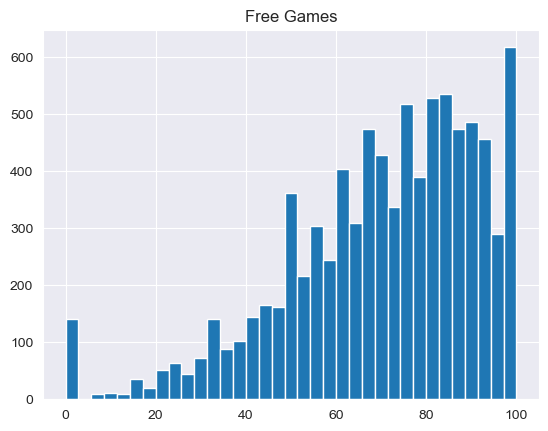

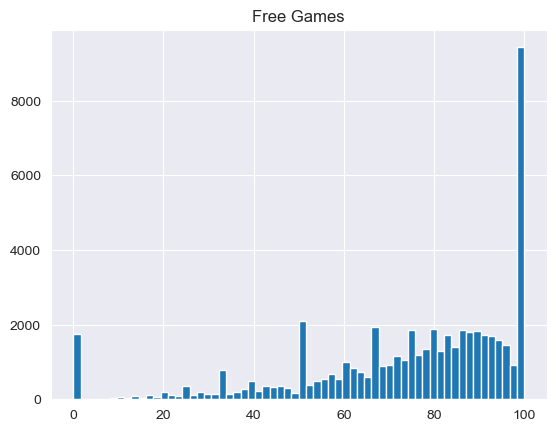

In [30]:
plt.hist(free_games, bins="auto")
plt.title("Free Games")
plt.show()

plt.hist(paid_games, bins="auto")
plt.title("Free Games")
plt.show()

Q-Q plot:

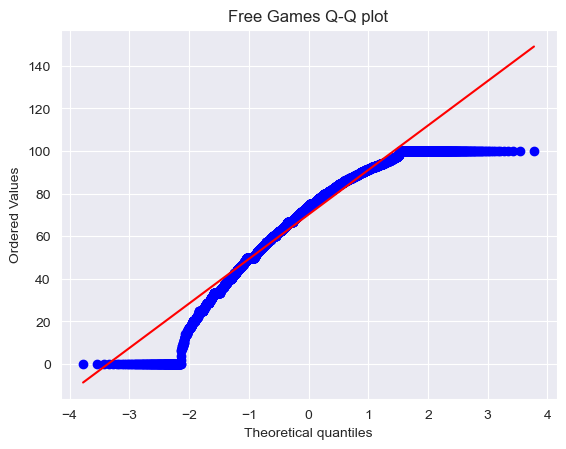

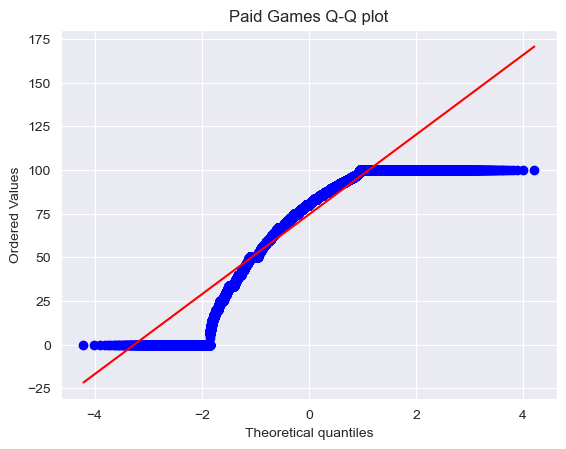

In [31]:
stats.probplot(free_games, dist="norm", plot=plt)
plt.title("Free Games Q-Q plot")
plt.show()

stats.probplot(paid_games, dist="norm", plot=plt)
plt.title("Paid Games Q-Q plot")
plt.show()

### Results of visual inspection:
 - Histogram:
    - Both samples do not have bell shape, therefore data is not normally distributed
 - Q-Q plot:
    - In our case the points deviate from the line, data is not normally distributed

### Step - 4
The results so far showed us that instead of t-test, we should rely on a non-parametric approach.
One such as Mann-Whitney U test.
#### The Mann-Whitney U test is a nonparametric statistical test used to determine whether there is a significant difference between the distributions of two independent, non-normally distributed samples.

In [32]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(free_games, paid_games)
print("Statistics=%.3f, p=%.3f" % (stat, p))

if p > alpha:
    print("Same distribution (fail to reject H_null)")
else:
    print("Different distribution (reject H_null)")

Statistics=195469599.500, p=0.000
Different distribution (reject H_null)


#### Results show us, that we can reject null hypothesis in favor of alternative hypothesis.
#### However, statistical significance does not necessarily mean practical significance. It's also important to consider the size of the effect (i.e., the difference between the groups) and whether it's meaningful in the real world context.

#### Moving onward, now that we know there's a statistically significant difference between the free and paid games ratings. Let's check which type of games have higher rating after all.
#### To obtain this information, we should calculate the median (as the Mann-Whitney U test compares medians and not means) of each group.

In [33]:
median_free_games = np.median(free_games)
median_paid_games = np.median(paid_games)

print("Median rating of free games: ", median_free_games)
print("Median rating of paid games: ", median_paid_games)

Median rating of free games:  74.1
Median rating of paid games:  80.2


### In conclusion:
#### The Mann-Whitney U test proved that, the difference is statistically significant. 
#### And by looking at the median comparison, we can come to conclusion that paid games have higher ratings than free games in our dataset.

### The Bayesian average
Instead of relying on ratings, in order to rank games, another common method is to use a statistical measure called the Bayesian average. 
The Bayesian average is a method of estimating the mean of a population using outside factors, in our case, the average rating across all games and the typical number of ratings a game gets. This has the effect of "shrinking" individual game ratings towards the mean, which is very helpful in our case where games with very few ratings can have extreme average ratings.

#### Bayesian Average Formula:
   - WR = (v / (v + m)) * R + (m / (v + m)) * C
#### Where:
   - R = the average rating for each game, calculated as the number of positive ratings divided by the total number of ratings.
   - v = the number of ratings for each game, which is the total number of positive and negative ratings a game has received.
   - m = the minimum number of ratings required for a game to be considered in the rating calculation. It is a threshold value in our case for top 10% of all games.
   - C = the mean rating across all games, calculated as the average of the 'rating' for all games in the dataset.

In [7]:
df_bay_avg = df_stat.copy()
R = df_bay_avg["rating"]
v = df_bay_avg["total_ratings"]
m = df_bay_avg["total_ratings"].quantile(0.90)  
C = np.mean(df_bay_avg["rating"])  
df_bay_avg["weighted_rating"] = (v / (v + m)) * R + (m / (v + m)) * C
df_bay_avg.sort_values(by="weighted_rating", ascending=False)
df_bay_avg.head(5)

,appid,name,developer,publisher,rating,positive,negative,avg_owners,average_forever,median_forever,price_USD,initialprice_USD,discount_pct,english,languages,genre,tags,type,total_ratings,weighted_rating
0,570,Dota 2,Valve,Valve,82.3,1675039,360483,350000000,37327,902,0.00,0.00,0.0,Yes,"English, Bulgarian, Czech, Danish, Dutch, Finn...","Action, Free to Play, Strategy","Free to Play, MOBA, Multiplayer, Strategy, e-s...",Free,2035522,82.296265
1,1063730,New World,Amazon Games,Amazon Games,70.2,182077,77125,75000000,4641,1946,39.99,39.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Massively Multiplayer, RPG","Massively Multiplayer, Open World, MMORPG, RPG...",Paid,259202,70.212719
2,578080,PUBG: BATTLEGROUNDS,"KRAFTON, Inc.","KRAFTON, Inc.",57.4,1269439,943280,75000000,24540,8582,0.00,0.00,0.0,Yes,"English, Korean, Simplified Chinese, French, G...","Action, Adventure, Free to Play, Massively Mul...","Survival, Shooter, Battle Royale, Multiplayer,...",Free,2212719,57.406710
3,1172470,Apex Legends,Respawn Entertainment,Electronic Arts,80.5,568429,137990,75000000,8255,1279,0.00,0.00,0.0,Yes,"English, French, Italian, German, Spanish - Sp...","Action, Adventure, Free to Play","Free to Play, Multiplayer, Battle Royale, Shoo...",Free,706419,80.491542
4,730,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,88.8,6612258,833900,75000000,29864,6805,0.00,0.00,0.0,Yes,"English, Czech, Danish, Dutch, Finnish, French...","Action, Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",Free,7446158,88.798191


### Now let's look into genres of the games
First we will take a look at frequency of the game genres in the dataset

In [8]:
# Split comma separated genres into individual genres
genres = df_bay_avg["genre"].str.split(",", expand=True).stack()
genres = genres.str.strip()
genres = genres[genres != ""]

In [10]:
# Count the occurrence of each unique genre
genres_count = genres.value_counts()
genres_df = genres_count.reset_index()
genres_df.columns = ["genre", "count"]
genres_df.set_index("genre", inplace=True)

In [11]:
# Drop genres which are not games
game_genres = genres_df.drop(
    index=[
        "Early Access",
        "Free to Play",
        "Utilities",
        "Design & Illustration",
        "Animation & Modeling",
        "Education",
        "Video Production",
        "Audio Production",
        "Game Development",
        "Software Training",
        "Photo Editing",
        "Web Publishing",
        "Accounting",
        "Movie",
    ]
).reset_index()

In [12]:
game_genres

,genre,count
0,Indie,44505
1,Action,26787
2,Casual,25119
3,Adventure,24446
4,Simulation,12406
5,Strategy,12342
6,RPG,10954
7,Sports,3041
8,Racing,2455
9,Massively Multiplayer,1578


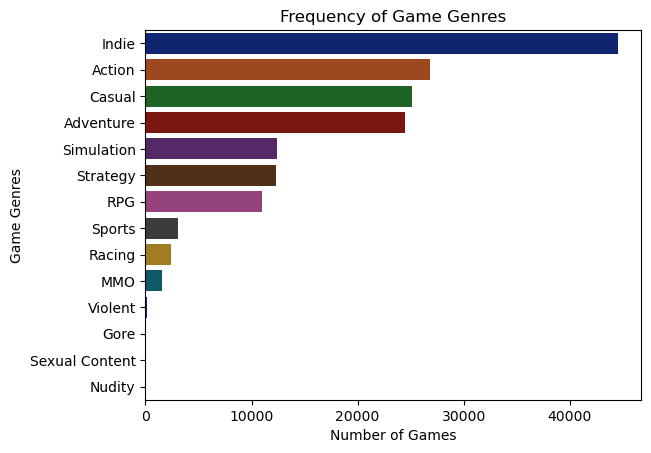

In [13]:
# Visualize the game genres in descending order, based on the occurence in the dataset
game_genres["genre"] = game_genres["genre"].replace("Massively Multiplayer", "MMO")
gen_fig = sns.barplot(data=game_genres, x="count", y="genre", palette="dark")
gen_fig.set_ylabel(ylabel="Game Genres")
gen_fig.set_xlabel(xlabel="Number of Games")
gen_fig.set_title("Frequency of Game Genres")

plt.show()

#### Let's find out which is the most prefered genre by owners

In [14]:
# List of game genres
game_genre_list = [
    "Indie",
    "Action",
    "Casual",
    "Adventure",
    "Simulation",
    "Strategy",
    "RPG",
    "Sports",
    "Racing",
    "Massively Multiplayer",
    "Violent",
    "Gore",
    "Sexual Content",
    "Nudity",
]

In [15]:
# Split the genre column and explode it to create a new row for each genre
genre_split = df_bay_avg.assign(genre=df_bay_avg["genre"].str.split(",")).explode("genre")

In [16]:
# Strip white spaces
genre_split["genre"] = genre_split["genre"].str.strip()

In [17]:
# Filter rows that belong to our genres list
genre_split = genre_split[genre_split["genre"].isin(game_genre_list)]

In [20]:
genre_split

,appid,name,developer,publisher,rating,positive,negative,avg_owners,average_forever,median_forever,price_USD,initialprice_USD,discount_pct,english,languages,genre,tags,type,total_ratings,weighted_rating
0,570,Dota 2,Valve,Valve,82.3,1675039,360483,350000000,37327,902,0.00,0.00,0.0,Yes,"English, Bulgarian, Czech, Danish, Dutch, Finn...",Action,"Free to Play, MOBA, Multiplayer, Strategy, e-s...",Free,2035522,82.296265
0,570,Dota 2,Valve,Valve,82.3,1675039,360483,350000000,37327,902,0.00,0.00,0.0,Yes,"English, Bulgarian, Czech, Danish, Dutch, Finn...",Strategy,"Free to Play, MOBA, Multiplayer, Strategy, e-s...",Free,2035522,82.296265
1,1063730,New World,Amazon Games,Amazon Games,70.2,182077,77125,75000000,4641,1946,39.99,39.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...",Action,"Massively Multiplayer, Open World, MMORPG, RPG...",Paid,259202,70.212719
1,1063730,New World,Amazon Games,Amazon Games,70.2,182077,77125,75000000,4641,1946,39.99,39.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...",Adventure,"Massively Multiplayer, Open World, MMORPG, RPG...",Paid,259202,70.212719
1,1063730,New World,Amazon Games,Amazon Games,70.2,182077,77125,75000000,4641,1946,39.99,39.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...",Massively Multiplayer,"Massively Multiplayer, Open World, MMORPG, RPG...",Paid,259202,70.212719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62961,1859220,疯狂厨房VR,703 Studio,703 Studio,0.0,0,1,10000,0,0,7.99,7.99,0.0,No,"English, Not supported, Simplified Chinese",Casual,"Casual, VR, Simulation, Funny, Stylized, Cooki...",Paid,1,73.785965
62961,1859220,疯狂厨房VR,703 Studio,703 Studio,0.0,0,1,10000,0,0,7.99,7.99,0.0,No,"English, Not supported, Simplified Chinese",Simulation,"Casual, VR, Simulation, Funny, Stylized, Cooki...",Paid,1,73.785965
62962,1800330,Destiny’s Plan,Carel,Carel,33.3,1,2,10000,0,0,0.00,0.00,0.0,Yes,English,Adventure,"Casual, Adventure, Visual Novel, Dating Sim, I...",Free,3,73.733289
62962,1800330,Destiny’s Plan,Carel,Carel,33.3,1,2,10000,0,0,0.00,0.00,0.0,Yes,English,Casual,"Casual, Adventure, Visual Novel, Dating Sim, I...",Free,3,73.733289


In [21]:
# Group by genre and get the mean of average owners, sort the values
genre_pref = (genre_split.groupby("genre")["avg_owners"].mean().sort_values(ascending=False))

In [22]:
genre_pref

genre
Massively Multiplayer    700205.956907
Action                   203332.026729
RPG                      189492.879313
Strategy                 150244.692918
Adventure                133269.041970
Simulation               122727.712397
Sports                   118265.373232
Racing                    89136.456212
Indie                     81091.001011
Casual                    58572.793503
Nudity                    45666.666667
Violent                   24228.395062
Sexual Content            19242.424242
Gore                      17929.292929
Name: avg_owners, dtype: float64

In [23]:
# Create a new DataFrame for easier plotting
genre_pref_df = pd.DataFrame({"Genre": genre_pref.index, "Average Owners": genre_pref.values})

In [24]:
# Apply log transform to 'Average Owners' column for better visualization
genre_pref_df["Log Avg Owners"] = np.log1p(genre_pref_df["Average Owners"])
genre_pref_df["Genre"] = genre_pref_df["Genre"].replace("Massively Multiplayer", "MMO")
genre_pref_df

,Genre,Average Owners,Log Avg Owners
0,MMO,700205.956907,13.459131
1,Action,203332.026729,12.222600
2,RPG,189492.879313,12.152112
3,Strategy,150244.692918,11.920027
4,Adventure,133269.041970,11.800133
5,Simulation,122727.712397,11.717732
6,Sports,118265.373232,11.680695
7,Racing,89136.456212,11.397935
8,Indie,81091.001011,11.303340
9,Casual,58572.793503,10.978043


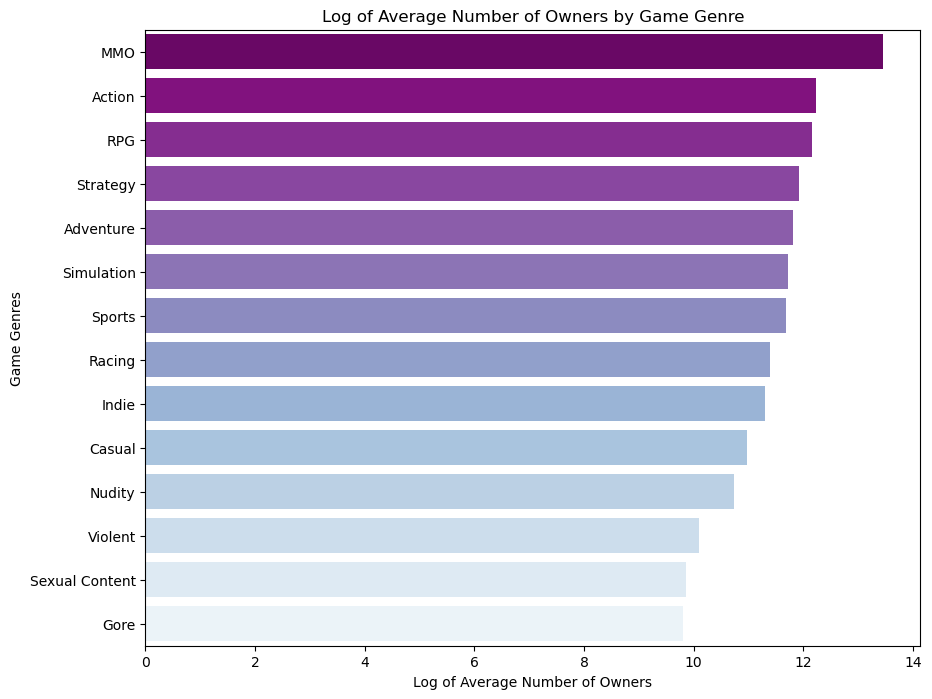

In [25]:
# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(
    y="Genre", x="Log Avg Owners", data=genre_pref_df, palette="BuPu_r", saturation=1
)
plt.title("Log of Average Number of Owners by Game Genre")
plt.xlabel("Log of Average Number of Owners")
plt.ylabel("Game Genres")
plt.show()

The plot shows that the most popular genre according to average owners of the games on steamspy is MMO (Massively Multiplayers).
Further we can look into MMO (Massively Multiplayer) genre to see which are the top 10 MMO games

In [26]:
mmo_df = genre_split[genre_split["genre"] == "Massively Multiplayer"]
mmo_df_rated = mmo_df.sort_values(by="weighted_rating", ascending=False)
mmo_df_rated.head(10)

,appid,name,developer,publisher,rating,positive,negative,avg_owners,average_forever,median_forever,price_USD,initialprice_USD,discount_pct,english,languages,genre,tags,type,total_ratings,weighted_rating
787,635260,CarX Drift Racing Online,"CarX Technologies, LLC","CarX Technologies, LLC",95.5,63655,3002,1500000,1251,835,14.99,14.99,0.0,Yes,"English, Russian, French, Italian, Korean, Jap...",Massively Multiplayer,"Racing, Driving, Automobile Sim, Multiplayer, ...",Paid,66657,95.211182
928,843380,Super Animal Royale,Pixile,Modus Games,93.9,34923,2270,1500000,278,90,0.00,0.00,0.0,Yes,"English, Japanese, Korean, Russian, Simplified...",Massively Multiplayer,"Battle Royale, Free to Play, Cute, Multiplayer...",Free,37193,93.425684
658,438040,Shakes and Fidget,Playa Games GmbH,Playa Games GmbH,93.5,29578,2052,1500000,3077,472,0.00,0.00,0.0,Yes,"English, French, Italian, German, Spanish - Sp...",Massively Multiplayer,"Free to Play, RPG, Massively Multiplayer, Casu...",Free,31630,92.955666
1229,326460,ShellShock Live,kChamp Games,kChamp Games,93.4,30734,2176,750000,1397,471,9.99,9.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...",Massively Multiplayer,"Tanks, Multiplayer, Strategy, 2D, Action, Turn...",Paid,32910,92.878940
266,35450,Red Orchestra 2: Heroes of Stalingrad with Ris...,Tripwire Interactive,Tripwire Interactive,92.4,33797,2768,3500000,1682,282,19.99,19.99,0.0,Yes,"English, French, German, Russian, Polish",Massively Multiplayer,"Realistic, World War II, FPS, Multiplayer, His...",Paid,36565,91.953845
401,471710,Rec Room,Rec Room,Rec Room,91.1,50422,4926,3500000,565,165,0.00,0.00,0.0,Yes,English,Massively Multiplayer,"Free to Play, VR, Multiplayer, Funny, Online C...",Free,55348,90.823672
2697,1293230,House of Detention,"Aniki, Male Union ♂",Dungeon Master,91.9,7930,697,350000,180,153,0.99,0.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...",Massively Multiplayer,"Dark Fantasy, Psychological Horror, Story Rich...",Paid,8627,90.193098
8158,2306590,Apewar,Gombe Games,Gombe Games,94.4,3198,189,75000,92,148,1.99,1.99,0.0,Yes,"English, French, Italian, German, Spanish - Sp...",Massively Multiplayer,"Action, Casual, Shooter, Action-Adventure, Mul...",Paid,3387,90.081960
162,1286830,STAR WARS: The Old Republic,Broadsword,Electronic Arts,89.9,48970,5519,7500000,5084,903,0.00,0.00,0.0,Yes,"English, French, German",Massively Multiplayer,"Free to Play, MMORPG, Multiplayer, Character C...",Free,54489,89.638927
1838,589290,Holdfast: Nations At War,Anvil Game Studios,Anvil Game Studios,90.2,20416,2217,750000,802,449,19.99,19.99,0.0,Yes,"English, French, German, Spanish - Spain, Japa...",Massively Multiplayer,"Historical, Multiplayer, War, Strategy, Milita...",Paid,22633,89.574053


#### Our result shows that 'CarX Drift Racing Online' is the the winner among the MMO games rated by weighted_rating.

### Useful information about variables:
#### df_steamspy
 - steam_spy_apps_cleaned.csv read into DataFrame
#### df_steamspy_exp
 - type column added to the df_steamspy DataFrame for structural exploration
 - later total_ratings column also added
#### df_type 
 - DataFrame created from df_steamspy_exp for visualization in seaborns pairplot
#### over_100
 - a subset of df_steamspy_exp with total_ratings over 100 votes
#### df_a and df_b
 - df_a copy of df_steamspy_exp with a subset column for comparison
 - df_b copy of over_100 with a subset column for comparison
#### own_over_10000 and avg_own_10000
 - own_over_10000 a subset of df_steamspy_exp where average owners are over 10000
 - avg_own_10000 a subset of df_steamspy_exp where average owners are equal to 10000
#### df_stat 
 - a subset df_steamspy_exp where total ratings are over 0
#### free_games and paid_games
 - subset DataFrames of df_stat for statistical analysis
 - has only type and rating columns from df_stat where type is free for free_games and paid for paid_games
#### median_free_games and median_paid_games
 - median values for free_games and paid_games respectively
#### df_bay_avg
 - copy of df_stat with added column "weighted_rating"
 - weighted_rating is rating calculated with bayesian average
#### genres
 - individual genres from genre column of df_bay_avg
#### genres_count
 - value counts for genres
#### game_genres
 - a DataFrame with two columns, genres of interest and value counts in descending order
#### gen_fig
 - variable for visualization of game_genres, shows genre frequency of games in the dataset
#### game_genre_list
 - a list of game genres for genre popularity analysis
#### genre_split
 - df_bay_avg DataFrame with genre column exploded and split, includes only genres in the game_genre_list
#### genre_pref
 - contains results for mean value of average owners for each genre in genre_split DataFrame
#### genre_pref_df
 - DataFrame with genres from genre_pref, mean values of average owners for each genre and log transformation of those values in a separate column
 - used for visualization of genre popularity
 - Massively Multiplayer in Genre column has been changed into MMO in order to shorten the name in visualization
#### mmo_df
 - subset of genre_split DataFrame where genres include only Massively Multiplayer games
#### mmo_df_rated 
 - mmo_df DataFrame sorted by "weighted_rating" in descending order

## CONCLUSION:
#### This was my first Data Analyst portfolio project in python. I've learned quite a lot and enjoyed it while working on the project. 
#### Any insight, advice or critique from community is most welcomed. 
#### Also, I hope that the project will help other beginners like myself to learn and improve, please feel free to use it as you want.

### Many thanks:
#### To my brother Farid Musa, for his guidence, teaching and encouragement. 
 - https://www.linkedin.com/in/faridmusa/
 - https://github.com/mmtechslv
#### To Nik Davis, for the idea and insight on the project. 
 - https://github.com/nik-davis
#### To Alex Freberg, for the free and very helpful courses on his YouTube channel. 
 - https://www.youtube.com/c/AlexTheAnalyst